# HW6. Критерии однородности.
#### Ильичёв А.С., 693

In [7]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import pandas as pd
from statsmodels.stats.multitest import multipletests

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 5) 

# Задача 2

In [2]:
data = np.load('hw6t2.npy')
data.shape

(100, 2)

In [3]:
X, Y = data.T

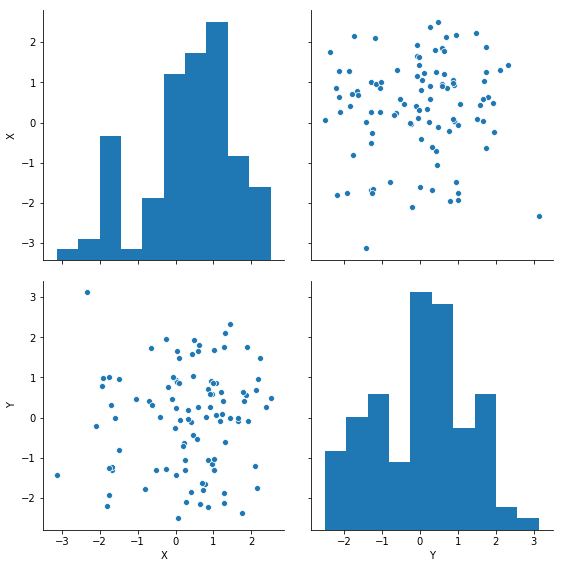

In [19]:
sns.pairplot(pd.DataFrame({'X': X, 'Y': Y}), height=4);

Для проверки однородности воспользуемся адаптированными критериями согласия. Для этого нужно сначала проверить выборки на независимость. Сделаем это с помощью коэффициента корреляции Кэндалла и воспользуемся процедурой Холма множественной проверки гипотез.

In [21]:
corr, p_corr = sts.kendalltau(X, Y)
corr, p_corr

(0.0492929292929293, 0.46743395879054583)

In [23]:
anderson_stat, _, p_anderson = sts.anderson_ksamp([X, Y])
anderson_stat, p_anderson

(2.4571124118904, 0.03147842175123911)

In [24]:
multipletests([p_corr, p_anderson], alpha=0.05, method='holm')

(array([False, False]),
 array([0.46743396, 0.06295684]),
 0.025320565519103666,
 0.025)

Значит, не отвергаем гипотезу об однородности выборок.

# Задача 3

In [85]:
data = pd.read_csv('weight.txt', sep='\t')
data

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4
5,88.7,103.6
6,94.9,98.4
7,76.3,93.4
8,81.0,73.4
9,80.5,82.1


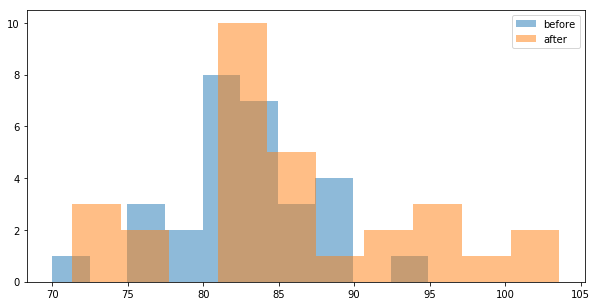

In [86]:
plt.hist(data['Before'], alpha=0.5, label='before')
plt.hist(data['After'], alpha=0.5, label='after')
plt.legend()
plt.show()

In [87]:
V = np.array(data['Before'] - data['After'])

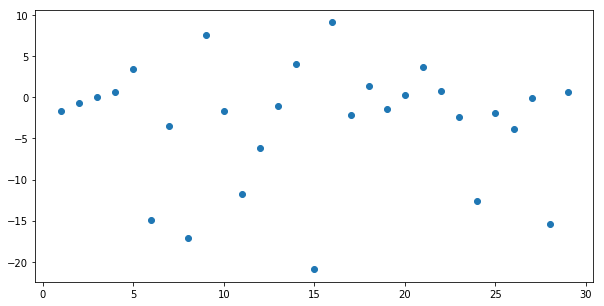

In [88]:
plt.scatter(np.arange(1, len(data) + 1), V);

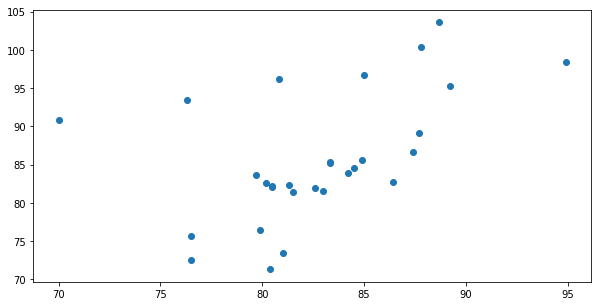

In [89]:
plt.scatter(data['Before'], data['After']);

Проверим симметричность распределения $V_i = X_i - Y_i$.

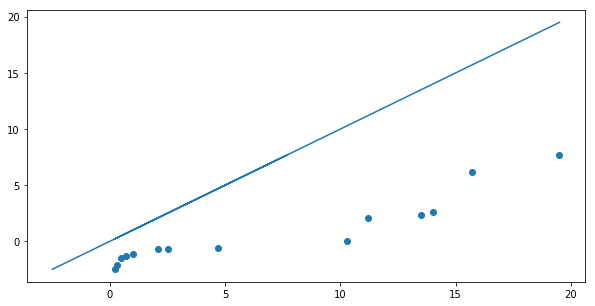

In [90]:
xi = (-np.sort(V) + np.median(V))[:len(V) // 2]
eta = (np.sort(V)[::-1] + np.median(V))[:len(V) // 2]
plt.scatter(xi, eta)
plt.plot(np.append(xi, eta), np.append(xi, eta))
plt.show()

Распределение не симметричное, значит, нельзя применить критерий знаковых рангов Уилкоксона. Проверим нормальность выборок.

In [91]:
sts.shapiro(data['Before'])

(0.9699368476867676, 0.5579800605773926)

In [92]:
sts.shapiro(data['After'])

(0.9519608616828918, 0.20574407279491425)

Проверим их независимость.

In [93]:
sts.kendalltau(data['Before'], data['After'])

KendalltauResult(correlation=0.4573579036177395, pvalue=0.0005164530410263133)

Кажется, они зависимы. Проверим гипотезу о равенстве матожиданий с помощью парного t-теста для зависимых выборок.

In [94]:
sts.ttest_rel(data['Before'], data['After'])

Ttest_relResult(statistic=-2.215587843931166, pvalue=0.03502259756218883)

Сделаем коррекцию на множественную проверку с помощью процедуры Холма.

In [96]:
pvalues = [sts.shapiro(data['Before'])[1], sts.shapiro(data['After'])[1], 
           sts.kendalltau(data['Before'], data['After'])[1], sts.ttest_rel(data['Before'], data['After'])[1]]
multipletests(pvalues, alpha=0.05, method='holm')

(array([False, False,  True, False]),
 array([0.55798006, 0.41148815, 0.00206581, 0.10506779]),
 0.012741455098566168,
 0.0125)

Итак, мы отвергаем гипотезу о независимости выборок (что делает корректным применение ttest) и принимаем все остальные. Значит, терапия не была эффективной.

# Задача 4

In [78]:
data = np.load('hw6t4.npy')
data.shape

(100, 2)

In [79]:
X, Y = data.T

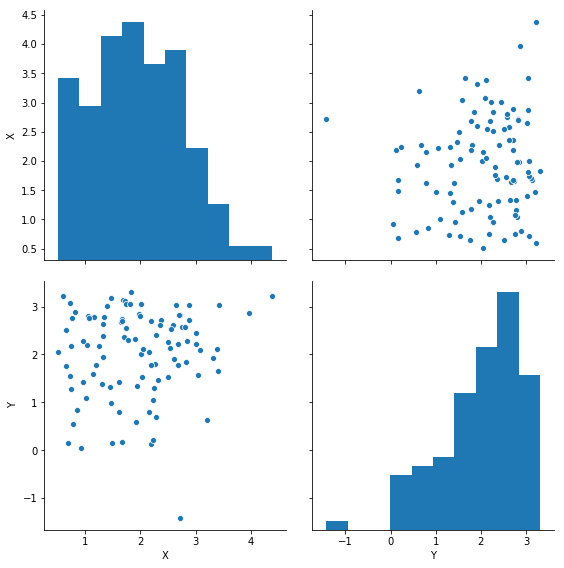

In [80]:
sns.pairplot(pd.DataFrame({'X': X, 'Y': Y}), height=4);

In [81]:
sts.kendalltau(X, Y)

KendalltauResult(correlation=0.05010101010101011, pvalue=0.46016634665415723)

Не отвергаем гипотезу о независимости. Проверим на нормальность.

In [98]:
sts.shapiro(X)

(0.9765814542770386, 0.07177740335464478)

In [112]:
sts.shapiro(Y)

(0.9240764379501343, 2.3313081328524277e-05)

Для одной выборки p-value очень маленькое, поэтому даже при множественной проверке не стоит использовать критерии, предполагающие нормальность выборок. Попробуем применить критерий Уилкоксона.

Проверим на симметричность.

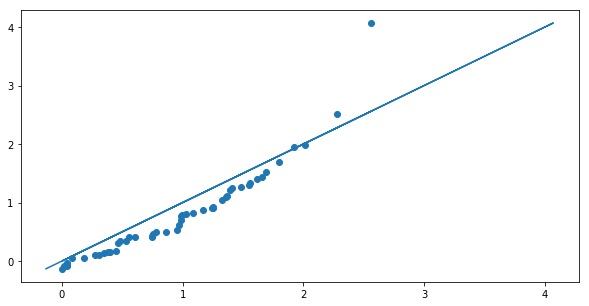

In [103]:
V = X - Y
xi = (-np.sort(V) + np.median(V))[:len(V) // 2]
eta = (np.sort(V)[::-1] + np.median(V))[:len(V) // 2]
plt.scatter(xi, eta)
plt.plot(np.append(xi, eta), np.append(xi, eta))
plt.show()

Если не считать одного выброса, точки хорошо ложатся на прямую, значит, можно использовать критерий знаковых рангов Уилкоксона для проверки $H_0: med(X-Y) = 0$, т.е. гипотезы об отстутствии эффекта.

In [106]:
(V == 0).any()

False

Нечего отбрасывать. Проверим, что нет совпадений.

In [111]:
len(np.unique(np.abs(V))) == len(V)

True

Их нет.

In [113]:
sts.wilcoxon(X, Y)

WilcoxonResult(statistic=2270.0, pvalue=0.38061003668382276)

Теперь сделаем множественную проверку (методом Бенджамини-Иекутиели).

In [116]:
p_values = [sts.kendalltau(X, Y)[1], sts.shapiro(X)[1], sts.shapiro(Y)[1], sts.wilcoxon(X, Y)[1]]

In [117]:
multipletests(pvalues, alpha=0.1, method='fdr_by')

(array([False, False,  True, False]),
 array([1.        , 0.57151131, 0.00430378, 0.14592749]),
 0.025996253574703254,
 0.025)

Итак, мы отвергаем гипотезу о нормальности второй выборки и принимаем остальные гипотезы, в частности, гипотезу об отсутствии эффекта.

# Задача 5

Вообще, при больших степенях свободы распределение Стьюдента довольно похоже на нормальное. Проверим это с помощью моделирования: сгенерируем много выборок из $t_{10}$ и применим к ним критерий Шапиро-Уилка. 

In [151]:
N = 10000
k = 100
p_values = []
for i in range(1000):
    sample = sts.t(df=10).rvs(k)
    _, p = sts.shapiro(sample)
    p_values.append(p)
p_values = np.array(p_values)

In [152]:
p_values.mean()

0.35003118908921727

In [153]:
len(p_values[p_values < 0.05]) / N

0.0223

Видим, что из выборок размера 100 всего для 2% отверглась гипотеза о нормальности на уровне значимости  0.05. Проверим критерий Стьюдента для разных N. Для этого сгенерируем пары выборок из одного распределения и посчитаем, в скольких случаях отвергается гипотеза об однородности.

In [173]:
ns = np.arange(10, 1000, 10)
N = 1000

In [179]:
def check_significance(ns):
    signifs = []
    for n in ns:
        errors = 0
        for i in range(N):
            X = sts.t.rvs(df=10, size=n)
            Y = sts.t.rvs(df=10, size=n)
            stat, _ = sts.ttest_ind(X, Y)
            if stat > sts.t.ppf(1 - 0.05 / 2, df=2 * n - 2):
                errors += 1
        signifs.append(errors / N)
    return signifs

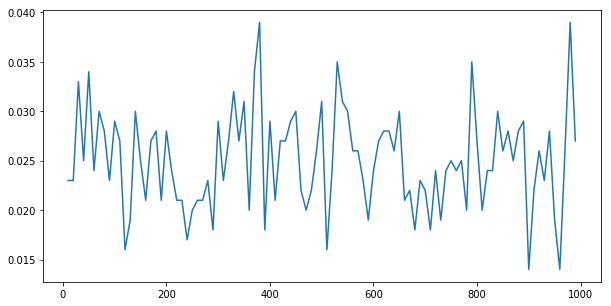

In [180]:
signifs = check_significance(ns)
plt.plot(ns, signifs);

На маленьких выборках реальный уровень значимости даже меньше заявленного 0.05, то есть критерием можно пользоваться. Проверим его работу на больших выборках.

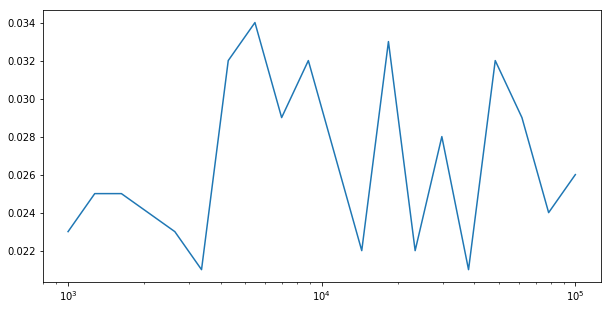

In [182]:
ns_big = np.array([int(x) for x in np.logspace(3, 5, 20)])
signifs = check_significance(ns_big)
plt.semilogx(ns_big, signifs);

Тоже работает. Критерием можно пользоваться.